# Model Building

In [1373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from math import sqrt
from sklearn.feature_selection import RFECV

%matplotlib inline

In [1374]:
merged_train = pd.read_pickle("merged_train-processed.pkl")

In [1396]:
merged_test = pd.read_pickle("merged_test-processed.pkl")

In [1375]:
X_test = pd.read_pickle("X_test.pkl")

In [1376]:
cols = merged_train.columns

In [1377]:
targets = ["m1","m2","m3","m4","m5","m6"]

In [1378]:
target_id = [merged_train.columns.get_loc(c) for c in targets if c in merged_train]

In [1379]:
cols = cols.delete([target_id])[1:]
cols

Index(['Deposit', 'AccessoryRate', 'RatePerUnit', 'DaysOnDeposit', 'Age',
       'Term', 'TotalContractValue', 'DaysLate', 'ExpectedTerm',
       'rateTypeEntity_DAILY', 'rateTypeEntity_MONTHLY',
       'rateTypeEntity_WEEKLY', 'MainApplicantGender_Female',
       'MainApplicantGender_Male', 'Region_Coast Region',
       'Region_Mount Kenya Region', 'Region_Nairobi Region',
       'Region_North Rift', 'Region_Nyanza', 'Region_South Rift',
       'Region_Western', 'Occupation_Business',
       'Occupation_Driver/Motorbike Rider', 'Occupation_Farmer',
       'Occupation_Government Employee', 'Occupation_Labourer',
       'Occupation_Other', 'Occupation_Teacher', 'TotalPastPayments',
       'NumPayments', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
       '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
       '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
       '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
 

In [1380]:
scaler = StandardScaler()
df_train = pd.DataFrame(scaler.fit_transform(merged_train.loc[:,cols]), columns=cols)
df_train.head()

,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,DaysLate,ExpectedTerm,rateTypeEntity_DAILY,...,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
0,-0.831076,-0.14611,-0.254059,0.720804,0.181504,-0.397347,-0.808030,-1.123637,-1.258791,0.066728,...,-0.554884,-0.682172,-0.648537,-0.581224,-0.539945,-0.477487,-0.454375,-0.354686,-0.313379,-0.308788
1,-0.831076,4.29685,-0.254059,0.720804,0.808897,-0.166851,0.643161,-1.055325,-0.970568,0.066728,...,-0.554884,-0.682172,-0.648537,-0.581224,-0.539945,-0.477487,-0.454375,-0.354686,-0.313379,-0.308788
2,-0.831076,-0.14611,-0.254059,0.720804,0.360759,-0.397347,-0.808030,-0.476476,-0.558377,0.066728,...,-0.554884,-0.682172,-0.648537,-0.581224,-0.539945,-0.477487,-0.454375,-0.354686,-0.313379,-0.308788
3,-0.831076,-0.14611,-0.254059,0.720804,1.525917,-0.397347,-0.808030,-0.537597,-0.620360,0.066728,...,-0.554884,-0.682172,-0.648537,-0.581224,-0.539945,-0.477487,-0.454375,-0.354686,-0.313379,-0.308788
4,-0.831076,-0.14611,-0.254059,0.720804,1.525917,-0.397347,-0.808030,-1.112851,-1.106931,0.066728,...,-0.554884,-0.682172,-0.648537,-0.581224,-0.539945,-0.477487,-0.454375,-0.354686,-0.313379,-0.308788


'''
olsmod = LinearRegression()
olsmod.fit(X=df_train, y=merged_train.m2)
'''

'''
rfe = RFECV(estimator=olsmod, cv=5, scoring="neg_mean_squared_error")
rfe.fit(X=df_train, y=merged_train.m2)
print('Selected', rfe.n_features_, 'features:')
df_train.columns[rfe.support_]
'''

'''
cols_remove = [df_train.columns.get_loc(c) for c in df_train.columns if not c in df_train.columns[rfe.support_] ]
cols = cols.delete(cols_remove)
df_train = pd.DataFrame(df_train.loc[:,cols], columns=cols)
df_train.columns
'''

In [1381]:
pca = PCA()

In [1382]:
pc_scores = pca.fit_transform(df_train)

In [1383]:
PC_NUMBERS = np.arange(1, df_train.shape[1]+1)
PC_LABELS = ['PC'+str(i) for i in PC_NUMBERS]

In [1384]:
pc_scores = pd.DataFrame(pc_scores, columns=PC_LABELS)
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91
0,-4.468430,30.098871,7.758583,-18.832663,0.234202,0.023731,-0.409347,1.758737,0.676609,0.353203,...,9.437897,1.430105,0.118245,0.063111,0.065334,2.666575e-14,-2.472302e-14,-7.460406e-15,-1.442374e-14,7.297156e-15
1,-4.839769,53.861403,14.259293,-28.909721,2.085608,0.870732,-0.005590,-2.014972,1.037631,2.876617,...,1.517811,-1.866793,0.258835,0.376927,-0.014262,-3.013241e-14,-9.467292e-14,8.106880e-16,-6.869900e-15,2.029558e-15
2,-5.603228,57.363602,15.297465,-31.454544,2.878741,0.207409,0.492649,-0.902936,-0.698280,0.162351,...,-1.066095,-6.950814,-0.111422,0.091018,0.007411,9.579541e-13,6.410862e-14,-4.094883e-15,1.431524e-15,1.692117e-15
3,-5.169784,51.320023,13.455509,-15.858160,1.465976,0.208755,0.383468,-1.434906,-0.772281,-0.447779,...,1.809690,3.536400,0.210420,0.069656,-0.015073,-2.576831e-13,2.252757e-13,-1.206711e-14,2.775335e-15,7.850632e-17
4,-4.966160,41.959953,11.029228,-26.061400,1.151974,0.107221,-0.231811,1.791109,1.225997,0.544452,...,-1.989457,0.093164,0.004657,-0.044547,-0.006460,1.494038e-14,1.632241e-14,-2.862025e-15,-2.334653e-15,-4.216811e-15


In [1385]:
variance_explained = pd.DataFrame(
    {
        'PC': PC_NUMBERS,
        'Proportion': pca.explained_variance_ratio_
    }
)
variance_explained["Cumulative"] = variance_explained.Proportion.cumsum()

Text(0.5, 1.0, 'Scree Plot')

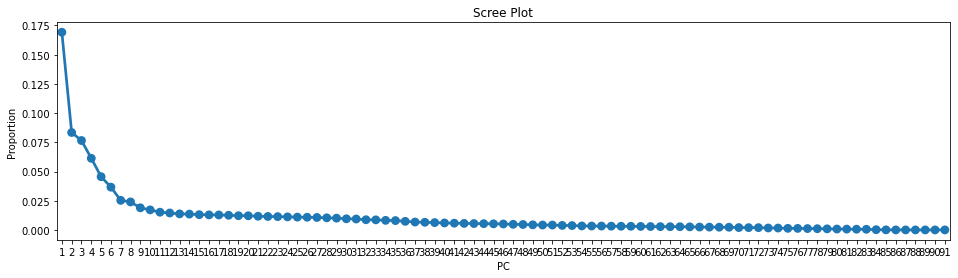

In [1386]:
    plt.figure(figsize=(16, 4))
    sns.pointplot(
        x="PC", y="Proportion",
        data=variance_explained
    ).set_title('Scree Plot')

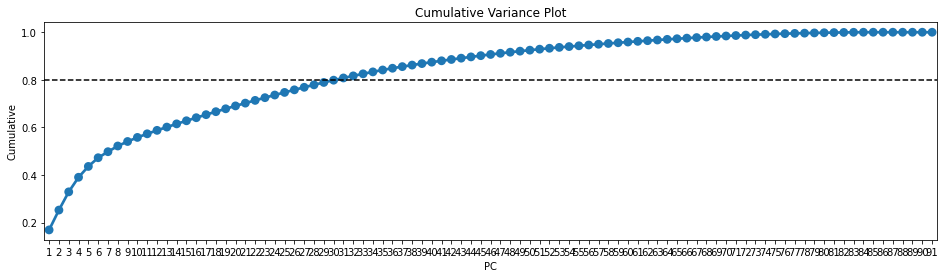

In [1387]:
plt.figure(figsize=(16, 4))
plot = sns.pointplot(
    x="PC", y="Cumulative",
    data=variance_explained
)
plot.set_title('Cumulative Variance Plot')
plot.axhline(0.80, color = "black", linestyle='--')

In [1388]:
new_features = pc_scores.iloc[:,:20]
new_features

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-4.468430,30.098871,7.758583,-18.832663,0.234202,0.023731,-0.409347,1.758737,0.676609,0.353203,-1.073219,-8.204039,0.255109,-2.102554,1.129519,-1.372478,-1.268958,-1.259718,-2.024399,0.890780
1,-4.839769,53.861403,14.259293,-28.909721,2.085608,0.870732,-0.005590,-2.014972,1.037631,2.876617,-0.631027,2.096939,0.914567,1.243140,-0.219404,0.298916,2.554026,2.424367,1.412753,-3.149665
2,-5.603228,57.363602,15.297465,-31.454544,2.878741,0.207409,0.492649,-0.902936,-0.698280,0.162351,-0.028053,-5.691080,2.526653,-1.542395,-1.420059,1.331816,1.804809,3.266593,6.654838,3.202477
3,-5.169784,51.320023,13.455509,-15.858160,1.465976,0.208755,0.383468,-1.434906,-0.772281,-0.447779,1.911771,17.358123,-1.620277,4.720637,-2.192332,2.343450,-0.383888,0.950509,-0.493982,0.233214
4,-4.966160,41.959953,11.029228,-26.061400,1.151974,0.107221,-0.231811,1.791109,1.225997,0.544452,-1.584039,-9.963743,0.753466,-2.417042,1.508159,-1.602897,-0.964919,-1.061649,-1.361316,0.581916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27968,-3.966310,-1.124013,2.769406,-0.089379,-1.908747,0.502980,-1.212628,-2.024752,0.251755,-2.076953,-0.372943,0.668610,1.817624,-0.317803,0.074174,-1.787002,0.372551,-0.090397,0.192666,1.052242
27969,-3.781440,-1.599513,4.248293,0.057831,-0.925859,0.357462,1.452048,1.249842,0.182212,1.141420,0.420919,-0.174453,1.233075,0.075729,-2.007516,0.151444,-0.964109,-0.589932,2.071403,-0.752030
27970,-3.096404,-1.778804,4.989596,0.025487,-1.022724,0.641135,2.443866,0.650409,1.985375,1.242885,-0.404124,0.308184,0.240341,-1.496489,0.064743,0.987550,-0.152681,1.439756,1.885710,2.391738
27971,-3.819702,-1.390823,3.565278,-0.001281,-1.591385,0.324690,-0.398423,1.327011,-0.829679,0.376806,-0.171428,-0.049717,1.456717,-0.023861,-1.942360,-0.058578,-0.436779,-0.545745,1.879364,-0.985305


In [1389]:
model = LinearRegression()

cv_scores = cross_val_score(
    estimator=model,
    X=new_features,
    y=merged_train["m1"],
    scoring="neg_root_mean_squared_error",
    cv=10
)

cv_scores

array([-4016.82327161,  -343.84661647,  -331.08220669,  -425.28562788,
        -513.12028254,  -520.20336486,  -530.50616163,  -506.79460632,
        -393.68990022,  -464.05225621])

In [1390]:
cv_scores = -cv_scores

In [1391]:
(cv_scores.mean(), cv_scores.std())

(804.5404294434757, 1072.9980297050772)

In [1392]:
pred = pd.DataFrame(columns=targets)
for t in targets:
    model = LinearRegression()
    model.fit(new_features, merged_train[t])
    y_pred = model.predict(X_test)
    pred[t] = y_pred
    
    

In [1404]:
pred["ID"] = merged_test.ID
pred

,m1,m2,m3,m4,m5,m6,ID
0,-596.212709,-453.148733,-467.579273,-472.583857,-481.626751,-213.256268,ID_6L67PAA
1,-858.652752,-735.745739,-791.535670,-827.427951,-904.978769,-514.144517,ID_VJ80SX2
2,3410.607823,3334.726281,3306.205684,3475.875874,3518.140007,2353.865719,ID_7OU9HLK
3,4886.275543,5083.098881,4987.498241,5227.341145,5354.674962,3657.565560,ID_WVWTPGK
4,0.381953,162.247116,100.989734,115.227650,90.738016,154.726972,ID_04DSDQS
...,...,...,...,...,...,...,...
9331,757.516302,719.313941,693.769090,700.895746,736.238948,488.430536,ID_ATLMXQX
9332,698.625809,651.900252,615.023633,633.599659,642.390327,409.677402,ID_DYMC72D
9333,944.555465,904.219311,873.685730,875.748811,890.295357,606.739328,ID_5CBGHCN
9334,625.194705,594.855689,566.932812,569.485630,581.323278,372.831383,ID_HYHB585


In [1408]:
pred["m1"][pred.ID=="ID_6L67PAA"]

0   -596.212709
Name: m1, dtype: float64

In [1394]:
ss = pd.read_csv("SampleSubmission.csv")

In [1395]:
ss.dtypes

ID         object
Target    float64
dtype: object

In [1409]:
for i,data in ss.iterrows():
    contents = data[0].split(" ")
    
    ss.Target.iloc[i] = pred[contents[2]][pred.ID==contents[0]]
ss.head()
    
    

/Users/devanshimittal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,ID,Target
0,ID_6L67PAA x m1,-596.212709
1,ID_6L67PAA x m2,-453.148733
2,ID_6L67PAA x m3,-467.579273
3,ID_6L67PAA x m4,-472.583857
4,ID_6L67PAA x m5,-481.626751


In [1411]:
ss.to_csv('submissions.csv', index=False)

In [1362]:
X_train, X_test, y_train, y_test = train_test_split(new_features, merged_train["m1"], random_state=13)

In [1363]:
model = LinearRegression()

In [1364]:
model.fit(X_train,y_train)

LinearRegression()

In [1365]:
y_pred = model.predict(X_test)
y_pred

array([1105.45847361,  663.77436946,  992.70264926, ...,  818.85745786,
        822.16195028,  741.65980837])

In [1366]:
mse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

193377.38090637073

In [1367]:
sqrt(mse)

439.7469509915569